# Practical task: Apply hereinbefore presented algorithms for the aggregation and Compound datasets. Optimize the appropriate algorithms parameters.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.mixture import GaussianMixture

      V1     V2
0  15.55  28.65
1  14.90  27.55
2  14.45  28.35
3  14.15  28.80
4  13.75  28.05
(788, 2)


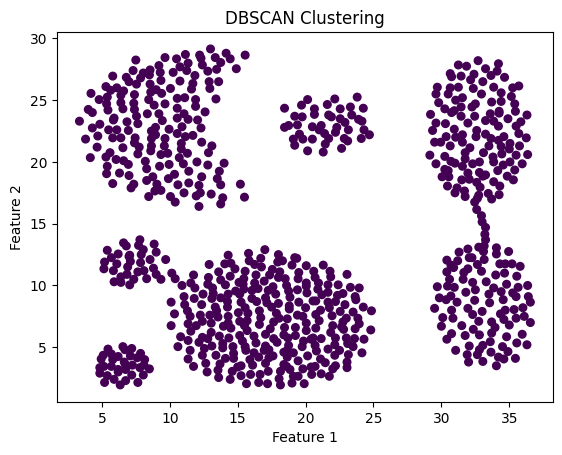

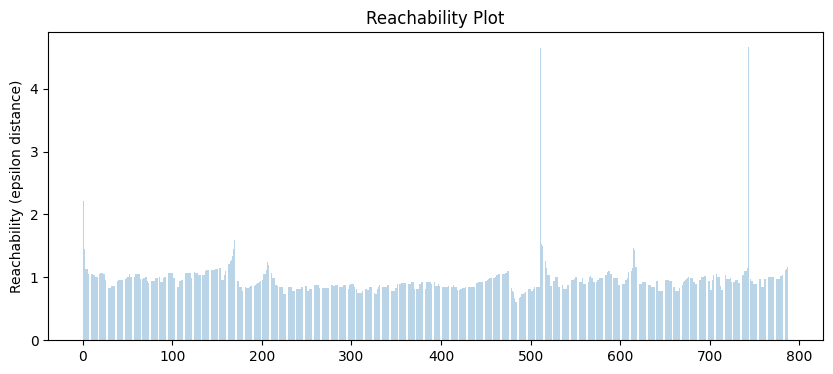

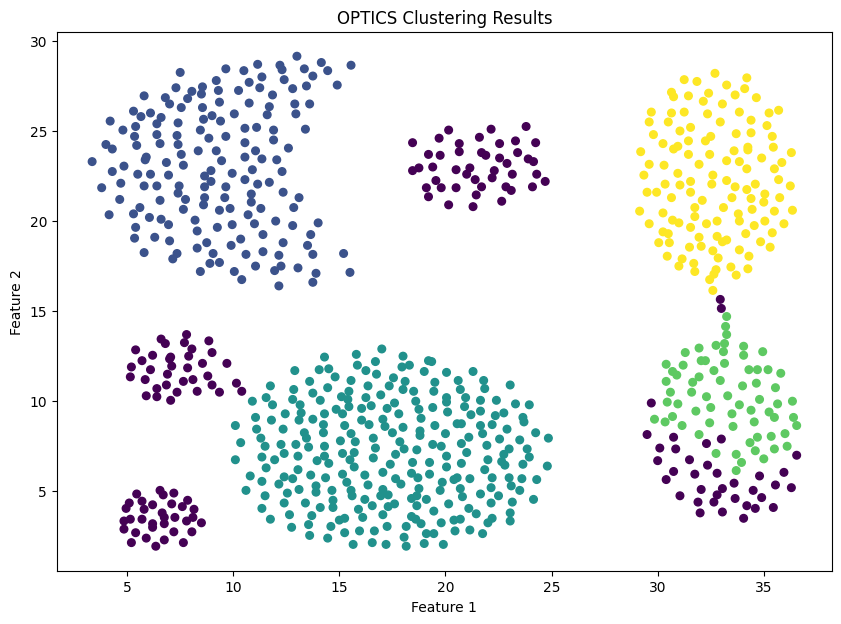

Text(0.5, 1.0, 'GMM Clustering')

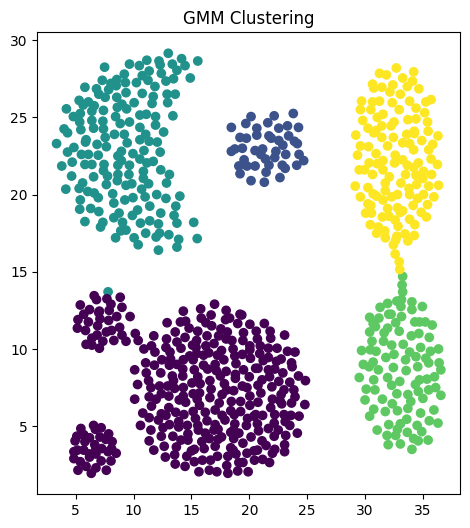

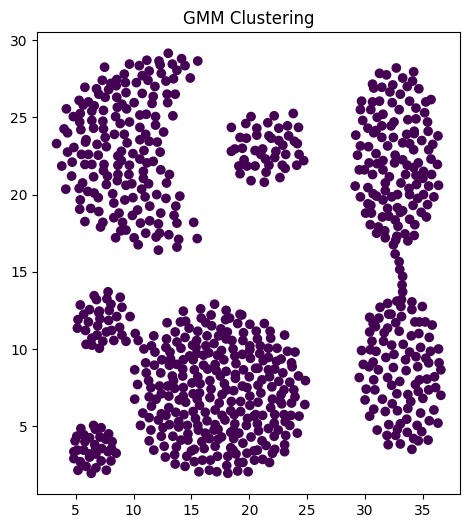

In [38]:
agg = pd.read_csv('aggregation.csv')
print(agg.head())
print(agg.shape)

dbscan = DBSCAN(eps=0.16, min_samples=5)
agglabels = dbscan.fit_predict(agg)

plt.scatter(agg['V1'], agg['V2'], c=agglabels, cmap='viridis', marker='o', s=30)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

optics = OPTICS(min_samples=6, xi=0.03, min_cluster_size=0.084)
optics.fit(agg)

aggspace = np.arange(len(agg))
reachability = optics.reachability_[optics.ordering_]
agglabels2 = optics.labels_[optics.ordering_]

plt.figure(figsize=(10, 4))
plt.bar(aggspace, reachability, alpha=0.3)
plt.ylabel('Reachability (epsilon distance)')
plt.title('Reachability Plot')
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(agg['V1'], agg['V2'], c=optics.labels_, cmap='viridis', marker='o', s=30)
plt.title('OPTICS Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

gmm_agg = GaussianMixture(n_components=5, random_state=42)
gmm_agg_labels = gmm_agg.fit_predict(agg)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(agg['V1'], agg['V2'], c=gmm_agg_labels, marker='o')
plt.title('GMM Clustering')

combined_labels = gmm_agg_labels.copy()
for i in range(len(agg)):
    # Refine GMM labels using DBSCAN, especially for noise points
    if agglabels[i] == -1:  # DBSCAN labels -1 as noise
        combined_labels[i] = -1  # Assign GMM point as noise

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(agg['V1'], agg['V2'], c=combined_labels, cmap='viridis', marker='o')
plt.title('GMM Clustering')

      V1     V2
0  26.75  22.15
1  29.80  22.15
2  31.55  21.10
3  27.70  20.85
4  29.90  19.95
(399, 2)


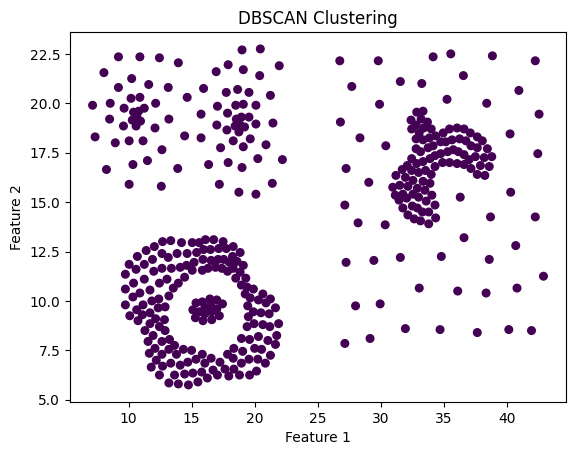

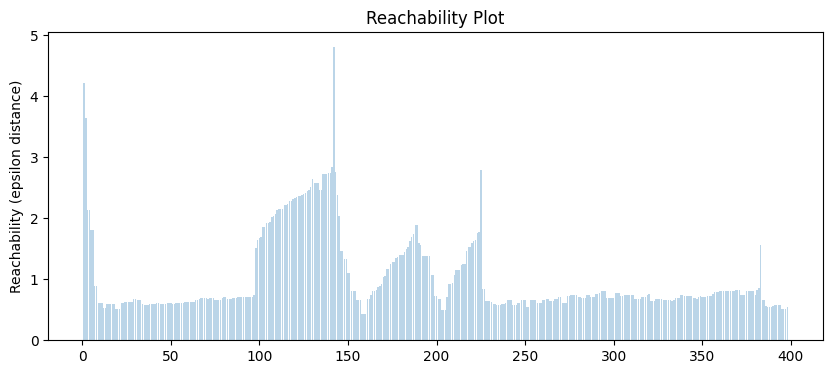

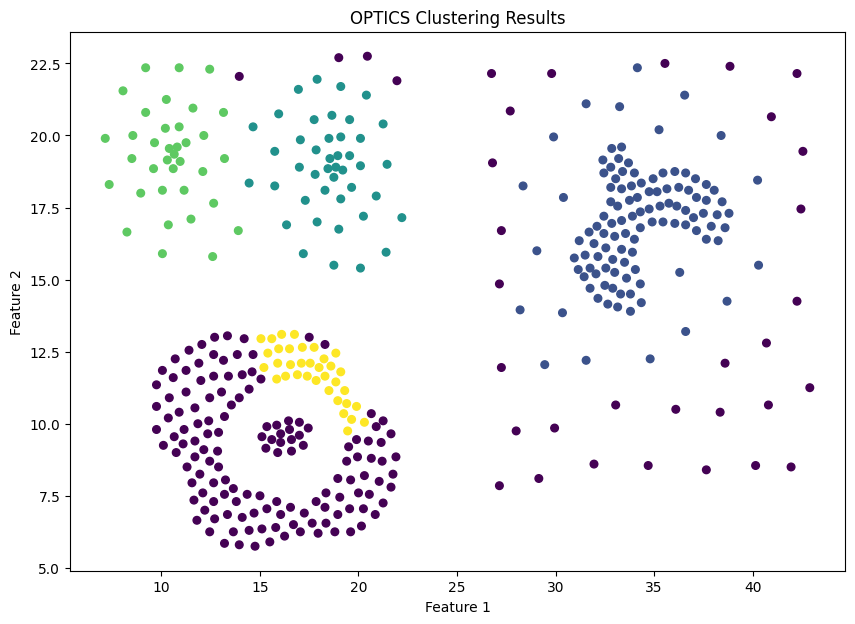

Text(0.5, 1.0, 'GMM Clustering')

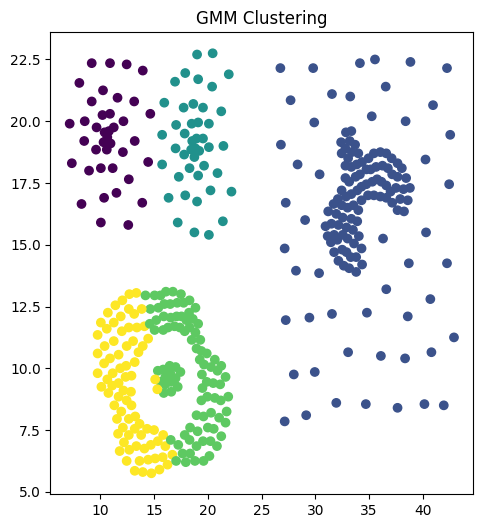

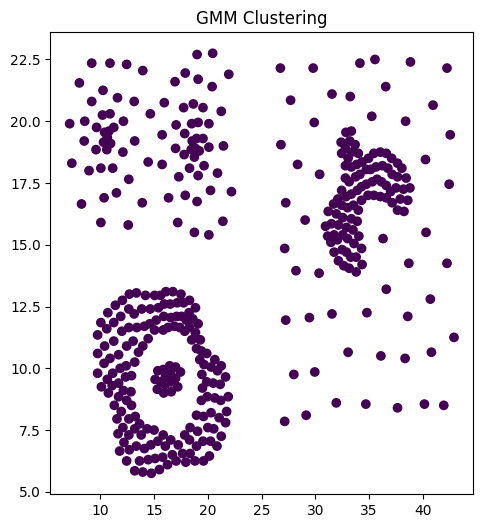

In [40]:
com = pd.read_csv('Compound.csv')
print(com.head())
print(com.shape)

dbscan = DBSCAN(eps=0.16, min_samples=5)
comlabels = dbscan.fit_predict(com)

plt.scatter(com['V1'], com['V2'], c=comlabels, cmap='viridis', marker='o', s=30)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

optics = OPTICS(min_samples=6, xi=0.03, min_cluster_size=0.084)
optics.fit(com)

comspace = np.arange(len(com))
reachability = optics.reachability_[optics.ordering_]
comlabels2 = optics.labels_[optics.ordering_]

plt.figure(figsize=(10, 4))
plt.bar(comspace, reachability, alpha=0.3)
plt.ylabel('Reachability (epsilon distance)')
plt.title('Reachability Plot')
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(com['V1'], com['V2'], c=optics.labels_, cmap='viridis', marker='o', s=30)
plt.title('OPTICS Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

gmm_com = GaussianMixture(n_components=5, random_state=42)
gmm_com_labels = gmm_com.fit_predict(com)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(com['V1'], com['V2'], c=gmm_com_labels, marker='o')
plt.title('GMM Clustering')

combined_labels = gmm_com_labels.copy()
for i in range(len(com)):
    # Refine GMM labels using DBSCAN, especially for noise points
    if comlabels[i] == -1:  # DBSCAN labels -1 as noise
        combined_labels[i] = -1  # Assign GMM point as noise

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(com['V1'], com['V2'], c=combined_labels, cmap='viridis', marker='o')
plt.title('GMM Clustering')